# Etude des sujets des amendements PLFSS

Based on https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

and https://www.stat4decision.com/fr/traitement-langage-naturel-francais-tal-nlp/

In [44]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [29]:
#!pip install pandas wordcloud  pyLDAvis spacy sklearn more_itertools
# Plus besoin de gensim nltk ?

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#!python -m spacy download fr_core_news_sm

In [3]:
# Importing modules
import pandas as pd
amdt = pd.read_csv('../../../donnees-extraites-assemblee/textes_amendements_nouveaux_articles_plfss_2020-2021.csv')# Print head
amdt.head()

,texteLegislatifUid,uid,avantAApres,dispositif,exposeSommaire
0,PRJLANR5L15B2296,AMANR5L15PO420120B2296P0D1N000001,A,"I. – Après l’alinéa 13, insérer l’alinéa suiv...",La mise en place d’un accord d’intéressement d...
1,PRJLANR5L15B2296,AMANR5L15PO420120B2296P0D1N000002,Apres,À la première phrase du premier alinéa de l’ar...,L’article L 531‑2 du Code de la Sécurité Socia...
2,PRJLANR5L15B2296,AMANR5L15PO420120B2296P0D1N000005,A,Compléter l’alinéa 17 par la phrase suivante :...,S’il est louable d’expérimenter des dispositif...
3,PRJLANR5L15B2296,AMANR5L15PO420120B2296P0D1N000008,A,"Après l’alinéa 8, insérer les cinq alinéas sui...",Cet amendement permet d’amplifier la portée de...
4,PRJLANR5L15B2296,AMANR5L15PO420120B2296P0D1N000010,Apres,Le premier alinéa de l’article L. 521‑1 du cod...,"Pendant plus de cinquante ans, notre politique..."


In [4]:
len(amdt)

4797

# Préparation des données

In [5]:
#amdt = amdt.drop(columns=['texteLegislatifUid', 'avantAApres'], axis=1)

In [6]:
amdt['texte'] = amdt['dispositif'] + amdt['exposeSommaire']

## Nettoyage
Retrait de la ponctuation

In [7]:
# Load the regular expression library
#import re# Remove punctuation
# amdt['texte'] = amdt['texte'].map(lambda x: re.sub('[,\.!?]', '', x))
# amdt['texte'] = amdt['texte'].map(lambda x: x.lower())
# amdt['texte'].head()

### Retrait des mots de liaison (_stopword_)

In [8]:
test = "Bonjour Madame Marianne et Monsieur Coq,\n Comment allez-vous ?"
print(test)

Bonjour Madame Marianne et Monsieur Coq,
 Comment allez-vous ?


In [9]:
import spacy
#from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
nlp = spacy.load("fr_core_news_sm")

In [10]:

def return_token(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte de chaque token
    #print(doc[4].pos_)
    # Retire la ponctuation et les retours à la ligne
    return [X.text for X in doc if X.is_punct is False | X.is_space is False | X.is_stop is False ]
test_token = return_token(test)
test_token

['Bonjour', 'Madame', 'Marianne', 'Monsieur', 'Coq', 'allez', '-vous']

In [11]:

# def remove_stopword_fr(sentence):
#     return [word for word in sentence if word not in fr_stop]

# remove_stopword_fr(test_token)

In [12]:
#"Bonjour" in fr_stop

In [13]:
data_words = []

def str_token(text):
    global data_words
    tokens = return_token(text)
    data_words += tokens
    return " ".join(tokens)

amdt['txt_sans_stopword'] = amdt['texte'].apply(str_token)

In [14]:
len(data_words)

566051

# Nuage des mots les plus utilisés
A noter que l'on peut donner une forme au nuage : https://amueller.github.io/word_cloud/auto_examples/parrot.html#sphx-glr-auto-examples-parrot-py

In [33]:
from collections import Counter
word_count = Counter(data_words)
# import more_itertools
# more_itertools.take(20, word_count.items())
word_count.most_common(30)

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('article', 8374),
 ('santé', 5587),
 ('sociale', 5293),
 ('L.', 5244),
 ('alinéa', 5167),
 ('sécurité', 4411),
 ('amendement', 4369),
 ('code', 4060),
 ('°', 2990),
 ('loi', 2111),
 ('mots', 2096),
 ('présent', 2035),
 ('soins', 2004),
 ('financement', 1972),
 ('charge', 1919),
 ('établissements', 1870),
 ('vise', 1866),
 ('rapport', 1770),
 ('personnes', 1742),
 ('maladie', 1653),
 ('taux', 1642),
 ('entreprises', 1576),
 ('euros', 1558),
 ('cotisations', 1549),
 ('1', 1474),
 ('2020', 1470),
 ('médicaments', 1450),
 ('II', 1448),
 ('dispositif', 1433),
 ('activité', 1376)]

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(amdt['txt_sans_stopword'].values))

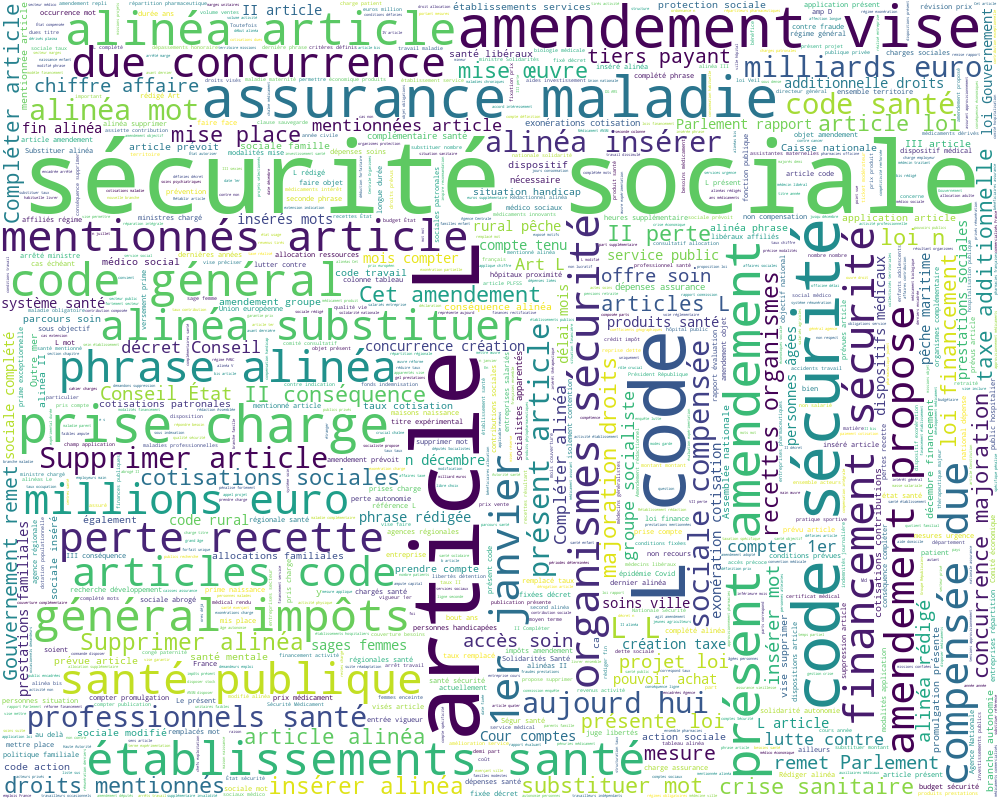

In [16]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", width=1000, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Analyse des thématiques par LDA

LDA : https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 15
 
# vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
#                              stop_words='french', lowercase=True, 
#                              token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(amdt["txt_sans_stopword"])
 
# Build a Latent Dirichlet Allocation Model
# n_jobs = -1 to use all CPU core
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online', n_jobs = -1)
lda_Z = lda_model.fit_transform(data_vectorized)


In [18]:

text = "Pour les entreprises de moins de 11 salariés, l’employeur est autorisé à attribuer une fois par an, à l’ensemble des salariés qu’il emploie, la prime exceptionnelle de pouvoir d’achat, dans les conditions prévues au V. »II. – En conséquence, compléter cet article par les deux alinéas suivants"
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x, x.sum())

[0.81076486 0.00155039 0.00155039 0.02633686 0.00155039 0.00155039
 0.00155039 0.00155039 0.00155039 0.00155039 0.02480619 0.00155039
 0.03452517 0.08806302 0.00155039] 0.9999999999999999


In [19]:
lda_Z.shape

(4797, 15)

In [45]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      114.344879  114.308296       1        1  26.534715
5      105.821045  -93.749626       2        1  14.196989
7     -138.334473   95.320763       3        1  14.057206
6       -7.436697  111.259697       4        1   7.870782
2     -207.550629 -105.472603       5        1   6.805771
11      52.817650   14.603765       6        1   6.486151
1      168.010849    6.806950       7        1   5.633706
9      -94.169601 -157.789551       8        1   4.143047
13    -122.849174  -39.059418       9        1   3.931092
14     -94.894264  195.408295      10        1   3.757187
12      24.927401 -180.464874      11        1   1.727179
3      -53.413467   26.832108      12        1   1.374674
8      -12.255850  -72.093201      13        1   1.323873
4     -224.217957   28.070581      14        1   1.198152
10      36.154255  209.427582      15        1   0.959475, topic_info=             Term         Freq        Total Category  logprob  loglift
1946       alinéa  5126.000000  5126.000000  Default  30.0000  30.0000
13163       santé  5893.000000  5893.000000  Default  29.0000  29.0000
9539         mots  2037.000000  2037.000000  Default  28.0000  28.0000
2458      article  8296.000000  8296.000000  Default  27.0000  27.0000
13461    sociales  1213.000000  1213.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
13543      sommes    26.976149   219.602384  Topic15  -5.2852   2.5497
9355    milliards    33.883783   670.481429  Topic15  -5.0572   1.6615
7352   groupement    18.998095    58.000802  Topic15  -5.6358   3.5304
6999        forme    19.230853   176.609442  Topic15  -5.6236   2.4291
11501    présente    18.534918   480.003677  Topic15  -5.6604   1.3924

[1005 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
0         15  0.971795     00
86         1  0.353833    100
86         7  0.266286    100
86         8  0.379367    100
102        1  0.401554     11
...      ...       ...    ...
15507      3  0.016943  œuvre
15507      4  0.033886  œuvre
15507      5  0.052370  œuvre
15507      7  0.027725  œuvre
15507      8  0.183294  œuvre

[2258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 8, 7, 3, 12, 2, 10, 14, 15, 13, 4, 9, 5, 11])

# WIP : Les entites les plus cités
Spacy permet d'extraire les nom de personne, de lieu, les dates, cela pourrait servir...

In [21]:
doc = nlp(test)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Bonjour Madame Marianne 0 23 PER
Monsieur Coq 27 39 PER


/home/ben/.virtualenvs/lex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
